#### Import the necessary libraries

In [1]:
import asyncio

from crawl4ai import AsyncWebCrawler
from dotenv import load_dotenv
import pandas as pd
from config import BASE_URL, CSS_SELECTOR, REQUIRED_KEYS
from utils.data_utils import (
    custom_modify_data,
    save_products_to_csv,
)
from utils.scraper_utils import (
    get_llm_config,
    fetch_and_process_page,
    get_browser_config,
    get_llm_strategy,
)
from matplotlib import pyplot as plt
load_dotenv()

True

#### This the main function for crawling the target website (Bunnings Ceiling Lights) that was defined in the config.py

In [2]:

async def crawl_products(num_pages:int=None)->pd.DataFrame:
    """
    Main function to crawl product data from the website.
    """
    # Initialize configurations
    browser_config = get_browser_config()
    llm_config = get_llm_config()
    llm_strategy = get_llm_strategy(llm_config)
    session_id = "product_crawl_session"

    # Initialize state variables
    page_number = 1
    all_products = []
    seen_titles = set()

    # Start the web crawler context
    # https://docs.crawl4ai.com/api/async-webcrawler/#asyncwebcrawler
    async with AsyncWebCrawler(config=browser_config) as crawler:
        while True:
            # Fetch and process data from the current page
            products, no_results_found = await fetch_and_process_page(
                crawler,
                page_number,
                BASE_URL,
                CSS_SELECTOR,
                llm_strategy,
                session_id,
                REQUIRED_KEYS,
                seen_titles,
            )

            if no_results_found:
                print("No more products found. Ending crawl.")
                break  # Stop crawling when "No Results Found" message appears

            if not products:
                print(f"No products extracted from page {page_number}.")
                break  # Stop if no products are extracted

            # Add the products from this page to the total list
            all_products.extend(products)
            page_number += 1  # Move to the next page

            # if a fixed number of pages are supposded to be read then check here
            if num_pages and page_number >= num_pages:
                break
            
            # Pause between requests to be polite and avoid rate limits
            await asyncio.sleep(2)  # Adjust sleep time as needed

    return custom_modify_data(all_products)

#### Start crawling the website page by page

In [6]:
# Read the first 5 pages of the target website. Pass None to real all pages.
df = await crawl_products(num_pages=5)  

[INIT].... → Crawl4AI 0.4.247
Loading page 1...
[FETCH]... ↓ https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Time: 6.75s
[SCRAPE].. ◆ Processed https://www.bunnings.com.au/search/products?&q=cei... | Time: 292ms
[COMPLETE] ● https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Total: 7.05s
[FETCH]... ↓ https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Time: 7.99s
[SCRAPE].. ◆ Processed https://www.bunnings.com.au/search/products?&q=cei... | Time: 321ms
[LOG] Call LLM for https://www.bunnings.com.au/search/products?&q=ceiling+lights&sort=BoostOrder?&page=1 - block index: 0


16:24:53 - LiteLLM:INFO: utils.py:3075 - 
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:LiteLLM:
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
16:25:12 - LiteLLM:INFO: utils.py:1177 - Wrapper: Completed Call, calling success_handler
INFO:LiteLLM:Wrapper: Completed Call, calling success_handler
16:25:12 - LiteLLM:INFO: cost_calculator.py:622 - selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b
INFO:LiteLLM:selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b


[LOG] Extracted 36 blocks from URL: https://www.bunnings.com.au/search/products?&q=ceiling+lights&sort=BoostOrder?&page=1 block index: 0
[EXTRACT]. ■ Completed for https://www.bunnings.com.au/search/products?&q=cei... | Time: 18.83459328103345s
[COMPLETE] ● https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Total: 27.19s
Extracted data: [{'title': 'Luce Bella 30cm Alabaster Oyster Light', 'price': '$19.90', 'reviews': 14}, {'title': 'Philips Oyster LED 1700Lm Cool White 17W', 'price': '$45', 'reviews': 14}, {'title': 'Brilliant 30cm Plug In DIY Tri Colour Calle Multi-Fit LED Oyster Ceiling Light To Replace Downlight', 'price': '$51', 'reviews': 0}, {'title': 'Brilliant 30cm Tri Colour Dimmable Value LED Oyster Ceiling Light', 'price': '$28.50', 'reviews': 6}, {'title': 'Philips Oyster LED 1400Lm Cool White 12W', 'price': '$35', 'reviews': 3}, {'title': 'Brilliant 18W 320mm White LED Salisbury II Oyster Ceiling Light', 'price': '$45', 'reviews': 21}, {'title': 'Click

16:25:28 - LiteLLM:INFO: utils.py:3075 - 
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:LiteLLM:
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
16:25:51 - LiteLLM:INFO: utils.py:1177 - Wrapper: Completed Call, calling success_handler
INFO:LiteLLM:Wrapper: Completed Call, calling success_handler
16:25:51 - LiteLLM:INFO: cost_calculator.py:622 - selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b
INFO:LiteLLM:selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b


[LOG] Extracted 36 blocks from URL: https://www.bunnings.com.au/search/products?&q=ceiling+lights&sort=BoostOrder?&page=2 block index: 0
[EXTRACT]. ■ Completed for https://www.bunnings.com.au/search/products?&q=cei... | Time: 23.69569755892735s
[COMPLETE] ● https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Total: 30.74s
Extracted data: [{'title': 'Verve Design 9W White 25cm Dion Oyster Ceiling Light', 'price': '$34.90', 'reviews': 0}, {'title': 'Brilliant 24W 380mm White LED Salisbury II Oyster Ceiling Light', 'price': '$67', 'reviews': 12}, {'title': 'Brilliant 12W 260mm White LED Salisbury II Oyster Ceiling Light', 'price': '$39', 'reviews': 5}, {'title': 'Brilliant 38cm Dual Power Tri-Colour Tradie LED Oyster Ceiling Light', 'price': '$85', 'reviews': 0}, {'title': 'Brilliant 30cm Tri-Colour IP54 Kleo Slimline LED Oyster Ceiling Light', 'price': '$49', 'reviews': 0}, {'title': 'Brilliant 23cm IP54 LED Tri-Colour Kleo Slimline Oyster Ceiling Light', 'price': '$39

16:26:07 - LiteLLM:INFO: utils.py:3075 - 
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:LiteLLM:
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
16:26:48 - LiteLLM:INFO: utils.py:1177 - Wrapper: Completed Call, calling success_handler
INFO:LiteLLM:Wrapper: Completed Call, calling success_handler
16:26:48 - LiteLLM:INFO: cost_calculator.py:622 - selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b
INFO:LiteLLM:selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b


[LOG] Extracted 36 blocks from URL: https://www.bunnings.com.au/search/products?&q=ceiling+lights&sort=BoostOrder?&page=3 block index: 0
[EXTRACT]. ■ Completed for https://www.bunnings.com.au/search/products?&q=cei... | Time: 42.06182523397729s
[COMPLETE] ● https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Total: 48.92s
Extracted data: [{'title': 'Telbix Silver Astrid 43 Led Oyster', 'price': '$119', 'reviews': 0}, {'title': 'Telbix Chrome Astrid 33 Led Oyster', 'price': '$99', 'reviews': 0}, {'title': 'Telbix Chrome Astrid 43 Led Oyster', 'price': '$49', 'reviews': 0}, {'title': 'Telbix Oak Astrid 33 Led Oyster', 'price': '$99', 'reviews': 0}, {'title': 'Telbix Oak Astrid 43 Led Oyster', 'price': '$119', 'reviews': 0}, {'title': 'Telbix Black Astrid 33 Led Oyster', 'price': '$99', 'reviews': 0}, {'title': 'Telbix White/Clear Amelia 40 Led Oyster', 'price': '$139', 'reviews': 0}, {'title': 'Telbix White/Clear Amelia 28 Led Oyster', 'price': '$92', 'reviews': 0}, {'

16:27:08 - LiteLLM:INFO: utils.py:3075 - 
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:LiteLLM:
LiteLLM completion() model= deepseek-r1-distill-llama-70b; provider = groq
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
16:27:22 - LiteLLM:INFO: utils.py:1177 - Wrapper: Completed Call, calling success_handler
INFO:LiteLLM:Wrapper: Completed Call, calling success_handler
16:27:22 - LiteLLM:INFO: cost_calculator.py:622 - selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b
INFO:LiteLLM:selected model name for cost calculation: groq/deepseek-r1-distill-llama-70b


[LOG] Extracted 24 blocks from URL: https://www.bunnings.com.au/search/products?&q=ceiling+lights&sort=BoostOrder?&page=4 block index: 0
[EXTRACT]. ■ Completed for https://www.bunnings.com.au/search/products?&q=cei... | Time: 14.735527473967522s
[COMPLETE] ● https://www.bunnings.com.au/search/products?&q=cei... | Status: True | Total: 23.94s
Extracted data: [{'title': 'Oriel Lighting Orbis Tricolour LED Ceiling Light White 50cm', 'price': '$262.90', 'reviews': 0}, {'title': 'Lexi Lighting Conea Ceiling Light', 'price': '$207', 'reviews': 0}, {'title': 'Vencha Brazza 12 Light Crystal Close to Ceiling Light - Gold', 'price': '$699.99', 'reviews': 0}, {'title': 'Brilliant 24W 30cm Matt White Eris 3-Mode Ceiling Light', 'price': '$105', 'reviews': 0}, {'title': 'Lexi Lighting Gamilah Dimmable 5 Lights LED Ceiling Light 48 cm', 'price': '$235.40', 'reviews': 0}, {'title': 'Vencha Suko 50w LED Close to Ceiling Light - White (3000K)', 'price': '$449.99', 'reviews': 0}, {'title': 'Vencha Suko 

#### Print the data frame

In [12]:
df

,brand,title,price,reviews
0,Luce,Bella 30cm Alabaster Oyster Light,$19.90,14
1,Philips,Oyster LED 1700Lm Cool White 17W,$45,14
2,Brilliant,30cm Plug In DIY Tri Colour Calle Multi-Fit LE...,$51,0
3,Brilliant,30cm Tri Colour Dimmable Value LED Oyster Ceil...,$28.50,6
4,Philips,Oyster LED 1400Lm Cool White 12W,$35,3
...,...,...,...,...
126,Verve,Design 36W Grid Connect Smart LED Hana Ceiling...,$89,30
127,Brilliant,Black Cambridge DIY Ceiling Mount Coach Light,$49,4
128,Verve,Design 24W Grid Connect Smart Fabric Shade Cei...,$112.90,4
129,HPM,210mm White Non-Ducted Ceiling Exhaust Fan wit...,$177.50,7



#### Plot the brands based on number of items each brand is selling

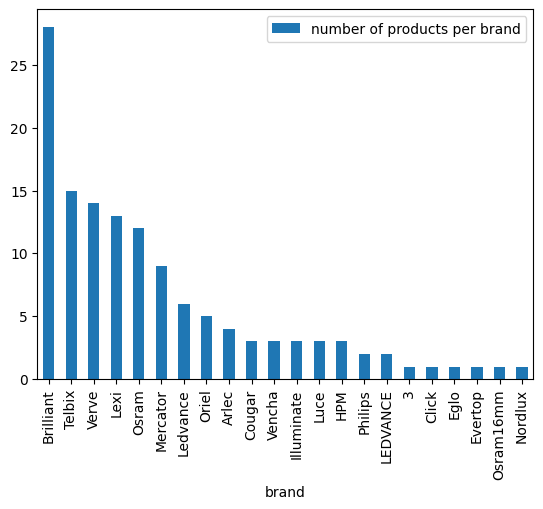

In [ ]:
df.groupby(['brand']).size().sort_values(ascending=False).plot(kind='bar', label='number of products per brand')
plt.legend()

#### Plot the brands based on total number of reviews for products of each brand

<Axes: xlabel='brand'>

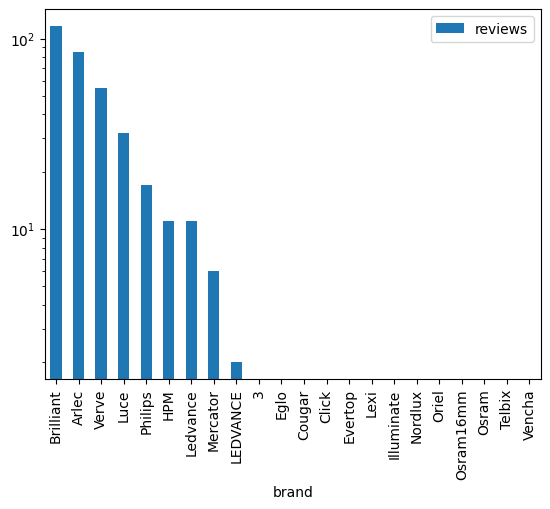

In [8]:
# Using logy=True parameter for logarithmic y-axis scale
df.groupby(['brand']).sum().sort_values('reviews', ascending=False).plot(kind='bar', logy=True, legend=True)


#### Save the data frame into a CSV file

In [ ]:
save_products_to_csv(df, 'Bunnings_ceiling_lights.csv')